**Importing Libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

**Load and Exploring Dataset**

In [ ]:
# Load the dataset
data = pd.read_csv('/content/sample_data/US_Accidents_March23_sampled_500k.csv')

# Display the first few rows to understand the data
print(data.head())

# Check for any missing values
print(data.isnull().sum())

X = data[['Temperature(F)', 'Wind_Direction', 'Sunrise_Sunset']]
y = data['Severity']


<ipython-input-6-6667a84a606c>:2: DtypeWarning: Columns (29,30,31,32,33,34,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/sample_data/US_Accidents_March23_sampled_500k.csv')


          ID   Source  Severity                     Start_Time  \
0  A-2047758  Source2         2            2019-06-12 10:10:56   
1  A-4694324  Source1         2  2022-12-03 23:37:14.000000000   
2  A-5006183  Source1         2  2022-08-20 13:13:00.000000000   
3  A-4237356  Source1         2            2022-02-21 17:43:04   
4  A-6690583  Source1         2            2020-12-04 01:46:00   

                        End_Time  Start_Lat   Start_Lng    End_Lat  \
0            2019-06-12 10:55:58  30.641211  -91.153481        NaN   
1  2022-12-04 01:56:53.000000000  38.990562  -77.399070  38.990037   
2  2022-08-20 15:22:45.000000000  34.661189 -120.492822  34.661189   
3            2022-02-21 19:43:23  43.680592  -92.993317  43.680574   
4            2020-12-04 04:13:09  35.395484 -118.985176  35.395476   

      End_Lng  Distance(mi)  ... Roundabout Station   Stop Traffic_Calming  \
0         NaN         0.000  ...      False   False  False           False   
1  -77.398282         0.05

**Exploratory Data Analysis**

Exploratory Data Analysis is a way of studying datasets to summarize their key properties, frequently using visual methods. Before applying more formal statistical modeling, EDA can assist identify trends, detect anomalies, test assumptions, and gain a better understanding of the dataset.


In [ ]:
#Summary of the DataFrame
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316421 entries, 0 to 316420
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     316421 non-null  object 
 1   Source                 316421 non-null  object 
 2   Severity               316421 non-null  int64  
 3   Start_Time             316421 non-null  object 
 4   End_Time               316421 non-null  object 
 5   Start_Lat              316421 non-null  float64
 6   Start_Lng              316421 non-null  float64
 7   End_Lat                176939 non-null  float64
 8   End_Lng                176939 non-null  float64
 9   Distance(mi)           316421 non-null  float64
 10  Description            316421 non-null  object 
 11  Street                 315987 non-null  object 
 12  City                   316408 non-null  object 
 13  County                 316420 non-null  object 
 14  State                  316420 non-nu

In [ ]:
#Check for missing values:
print(data.isnull().sum())


ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  139482
End_Lng                  139482
Distance(mi)                  0
Description                   0
Street                      434
City                         13
County                        1
State                         1
Zipcode                      67
Country                       1
Timezone                    327
Airport_Code                929
Weather_Timestamp          4851
Temperature(F)             6616
Wind_Chill(F)             81268
Humidity(%)                7044
Pressure(in)               5645
Visibility(mi)             7140
Wind_Direction             7075
Wind_Speed(mph)           23229
Precipitation(in)         89856
Weather_Condition          7034
Amenity                       1
Bump                          1
Crossing

**Univariate Analysis (Analysis of Single Variable)**



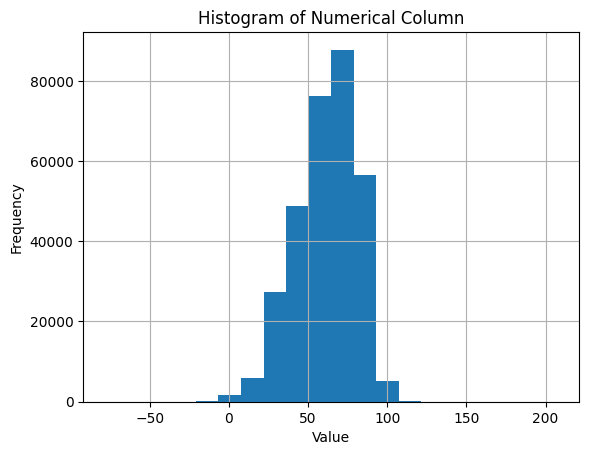

In [ ]:
#Histograms for numerical variables
import matplotlib.pyplot as plt

data['Temperature(F)'].hist(bins=20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Numerical Column')
plt.show()


**Bivariate Analysis (Analysis of Two Variables)**

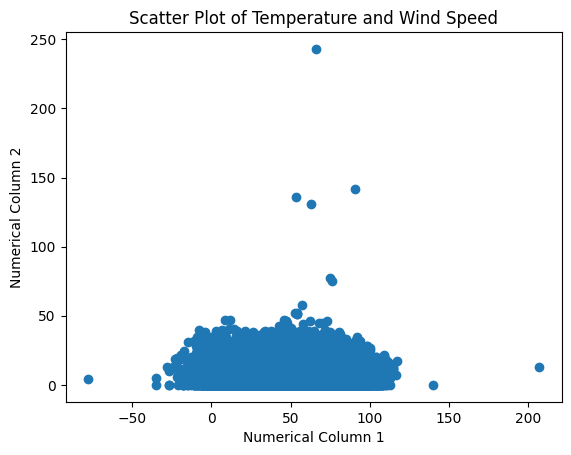

In [ ]:
#Scatter plot for two numerical variables
plt.scatter(data['Temperature(F)'], data['Wind_Speed(mph)'])
plt.xlabel('Numerical Column 1')
plt.ylabel('Numerical Column 2')
plt.title('Scatter Plot of Temperature and Wind Speed')
plt.show()


**Correlation Matrix**

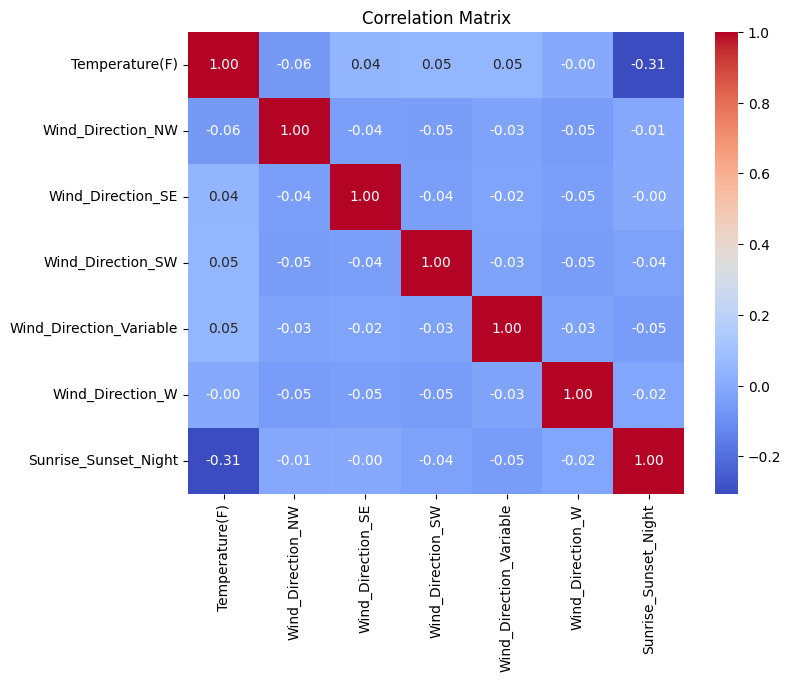

In [ ]:
#Encoding for the categorical features
encoded_data = pd.get_dummies(data, columns=['Wind_Direction', 'Sunrise_Sunset'], drop_first=True)

# Select the columns of interest
columns_corr = encoded_data[['Temperature(F)', 'Wind_Direction_NW', 'Wind_Direction_SE', 'Wind_Direction_SW', 'Wind_Direction_Variable', 'Wind_Direction_W', 'Sunrise_Sunset_Night']]


# Calculate the correlation matrix and plotting
corr = columns_corr.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


**Preprocessing**

Preprocessing in Knowledge Discovery in Databases (KDD) refers to the steps required to prepare raw data for future analysis and modeling. These stages include cleaning, transforming, and organizing data to make it suitable for data mining and machine learning algorithms.


In [ ]:
#For temperature, replacing missing values with the mean temperature
mean_temperature = X['Temperature(F)'].mean()
X['Temperature(F)'].fillna(mean_temperature, inplace=True)

#For categorical data like wind direction, replacing missing values with the mode
Wind_Direction = X['Wind_Direction'].mode()[0]
X['Wind_Direction'].fillna(Wind_Direction, inplace=True)
Sunrise_Sunset = X['Sunrise_Sunset'].mode()[0]
X['Sunrise_Sunset'].fillna(Sunrise_Sunset, inplace=True)

#Encode Categorical Variables
X = pd.get_dummies(X, columns=['Wind_Direction', 'Sunrise_Sunset'], drop_first=True)

# Display cleaned data
print(X.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-7-e87f7a0e03af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Temperature(F)'].fillna(mean_temperature, inplace=True)
<ipython-input-7-e87f7a0e03af>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Wind_Direction'].fillna(Wind_Direction, inplace=True)
<ipython-input-7-e87f7a0e03af>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sunrise_Sunset'].fillna(Sunrise_Sunset, inplace=True)


   Temperature(F)  Wind_Direction_Calm  Wind_Direction_E  Wind_Direction_ENE  \
0            77.0                False             False               False   
1            45.0                False             False               False   
2            68.0                False             False               False   
3            27.0                False             False                True   
4            42.0                False             False               False   

   Wind_Direction_ESE  Wind_Direction_East  Wind_Direction_N  \
0               False                False             False   
1               False                False             False   
2               False                False             False   
3               False                False             False   
4               False                False             False   

   Wind_Direction_NE  Wind_Direction_NNE  Wind_Direction_NNW  ...  \
0              False               False               False  ...

**RANDOM FOREST**

The dataset is divided into training and testing sets, scaled with 'StandardScaler', and treated for class imbalance with SMOTE. The Random Forest model is defined, trained on resampled training data, and then used to predict accident severity on the test set. The random forest model's accuracy is calculated and produced, along with a thorough classification report. Finally, normalized

Random Forest Accuracy: 0.6453

Classification Report for Random Forest:
              precision    recall  f1-score   support

           1       0.01      0.03      0.02        91
           2       0.81      0.76      0.78      7983
           3       0.21      0.24      0.23      1654
           4       0.04      0.06      0.05       272

    accuracy                           0.65     10000
   macro avg       0.27      0.27      0.27     10000
weighted avg       0.68      0.65      0.66     10000



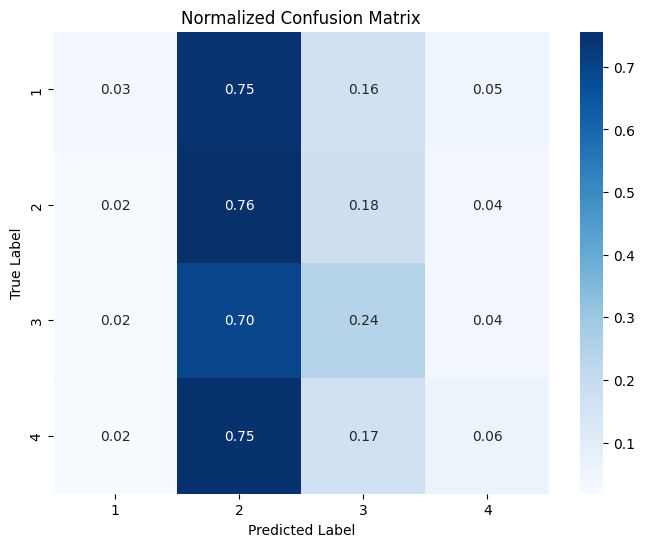

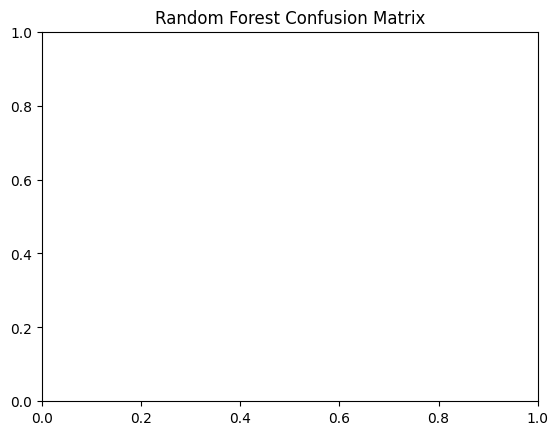

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, cmap=plt.cm.Blues):

    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized Confusion Matrix'
    else:
        title = 'Confusion Matrix'

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


data = pd.read_csv('/content/sample_data/US_Accidents_March23_sampled_500k.csv', low_memory=False)

# Use a smaller sample of the data
sampled_data = data.sample(frac=0.1, random_state=42)

X_classification = sampled_data[['Temperature(F)', 'Wind_Direction', 'Sunrise_Sunset']]
y_classification = sampled_data['Severity']


imputer = SimpleImputer(strategy='mean')
X_classification.loc[:, ['Temperature(F)']] = imputer.fit_transform(X_classification.loc[:, ['Temperature(F)']])
ct_cls = ColumnTransformer(
    [('encoder', OneHotEncoder(), [0, 1, 2])],
    remainder='passthrough'
)

X_classification = ct_cls.fit_transform(X_classification)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)


scaler_cls = StandardScaler(with_mean=False)
X_train_scaled_cls = scaler_cls.fit_transform(X_train_cls)
X_test_scaled_cls = scaler_cls.transform(X_test_cls)

# Handle imbalanced data with SMOTE for classification models
smote = SMOTE(random_state=42)
X_train_resampled_cls, y_train_resampled_cls = smote.fit_resample(X_train_scaled_cls, y_train_cls)

# Define and train the Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_resampled_cls, y_train_resampled_cls)

# Prediction and calculate accuracy
random_forest_preds = random_forest.predict(X_test_scaled_cls)
random_forest_accuracy = accuracy_score(y_test_cls, random_forest_preds)
print("Random Forest Accuracy:", random_forest_accuracy)

# Classification Report for Random Forest
print("\nClassification Report for Random Forest:")
print(classification_report(y_test_cls, random_forest_preds))

# Plot Confusion Matrix for Random Forest
classes = np.unique(y_test_cls)
plot_confusion_matrix(y_test_cls, random_forest_preds, classes, normalize=True, cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()


Improving the model with four features 'Temperature(F)', 'Wind_Direction', 'Sunrise_Sunset','Wind_Speed(mph)'

Random Forest Accuracy: 0.6774

Classification Report for Random Forest:
              precision    recall  f1-score   support

           1       0.03      0.03      0.03        91
           2       0.81      0.80      0.81      7983
           3       0.23      0.21      0.22      1654
           4       0.04      0.06      0.05       272

    accuracy                           0.68     10000
   macro avg       0.28      0.28      0.28     10000
weighted avg       0.69      0.68      0.68     10000



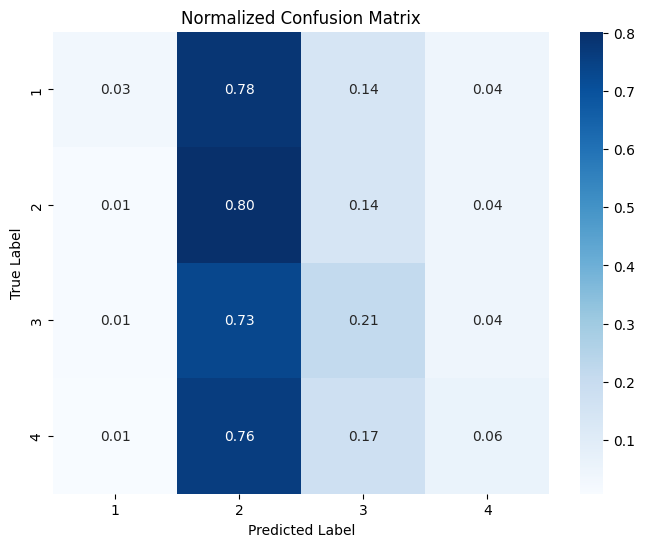

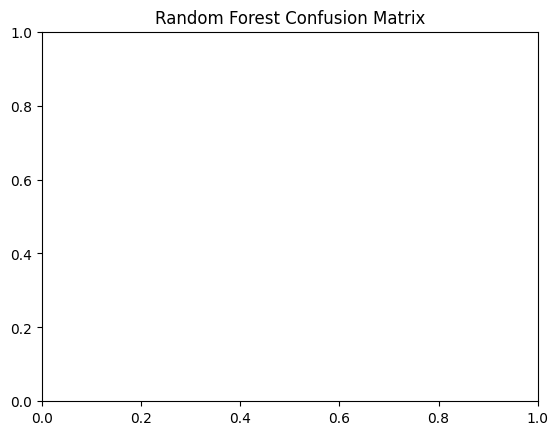

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized Confusion Matrix'
    else:
        title = 'Confusion Matrix'

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


data = pd.read_csv('/content/sample_data/US_Accidents_March23_sampled_500k.csv', low_memory=False)


sampled_data = data.sample(frac=0.1, random_state=42)

X_classification = sampled_data[['Temperature(F)', 'Wind_Direction', 'Sunrise_Sunset','Wind_Speed(mph)']]
y_classification = sampled_data['Severity']

# Impute missing values (NaNs) with mean
imputer = SimpleImputer(strategy='mean')
X_classification.loc[:, ['Temperature(F)']] = imputer.fit_transform(X_classification.loc[:, ['Temperature(F)']])
X_classification.loc[:, ['Wind_Speed(mph)']] = imputer.fit_transform(X_classification.loc[:, ['Wind_Speed(mph)']])

ct_cls = ColumnTransformer(
    [('encoder', OneHotEncoder(), [0, 1, 2])],
    remainder='passthrough'
)

X_classification = ct_cls.fit_transform(X_classification)

# Split the data into training and testing sets for classification models
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Feature scaling with 'with_mean=False' for sparse matrix for classification models
scaler_cls = StandardScaler(with_mean=False)
X_train_scaled_cls = scaler_cls.fit_transform(X_train_cls)
X_test_scaled_cls = scaler_cls.transform(X_test_cls)

# Handle imbalanced data with SMOTE for classification models
smote = SMOTE(random_state=42)
X_train_resampled_cls, y_train_resampled_cls = smote.fit_resample(X_train_scaled_cls, y_train_cls)

# Define the Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_resampled_cls, y_train_resampled_cls)

# Predictions
random_forest_preds = random_forest.predict(X_test_scaled_cls)
random_forest_accuracy = accuracy_score(y_test_cls, random_forest_preds)
print("Random Forest Accuracy:", random_forest_accuracy)

# Classification Report for Random Forest
print("\nClassification Report for Random Forest:")
print(classification_report(y_test_cls, random_forest_preds))

# Plot Confusion Matrix for Random Forest
classes = np.unique(y_test_cls)
plot_confusion_matrix(y_test_cls, random_forest_preds, classes, normalize=True, cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()


Added additional feature to improve accuracy 'Temperature(F)', 'Wind_Direction', 'Sunrise_Sunset','Wind_Speed(mph)','Humidity(%)'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized Confusion Matrix'
    else:
        title = 'Confusion Matrix'

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


data = pd.read_csv('/content/sample_data/US_Accidents_March23_sampled_500k.csv', low_memory=False)


sampled_data = data.sample(frac=0.1, random_state=42)

# Select features (X) and target variable (y) for classification models
X_classification = sampled_data[['Temperature(F)', 'Wind_Direction', 'Sunrise_Sunset','Wind_Speed(mph)','Humidity(%)']]
y_classification = sampled_data['Severity']

# Impute missing values (NaNs) with mean
imputer = SimpleImputer(strategy='mean')
X_classification.loc[:, ['Temperature(F)']] = imputer.fit_transform(X_classification.loc[:, ['Temperature(F)']])
X_classification.loc[:, ['Wind_Speed(mph)']] = imputer.fit_transform(X_classification.loc[:, ['Wind_Speed(mph)']])
X_classification.loc[:, ['Humidity(%)']] = imputer.fit_transform(X_classification.loc[:, ['Humidity(%)']])

# One-hot encoding for categorical variables
ct_cls = ColumnTransformer(
    [('encoder', OneHotEncoder(), [0, 1, 2])],
    remainder='passthrough'
)

X_classification = ct_cls.fit_transform(X_classification)

# Split the data into training and testing sets for classification models
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Feature scaling with 'with_mean=False' for sparse matrix for classification models
scaler_cls = StandardScaler(with_mean=False)  # Pass with_mean=False for sparse matrices
X_train_scaled_cls = scaler_cls.fit_transform(X_train_cls)
X_test_scaled_cls = scaler_cls.transform(X_test_cls)

# Handle imbalanced data with SMOTE for classification models
smote = SMOTE(random_state=42)
X_train_resampled_cls, y_train_resampled_cls = smote.fit_resample(X_train_scaled_cls, y_train_cls)

# Define the Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_resampled_cls, y_train_resampled_cls)


random_forest_preds = random_forest.predict(X_test_scaled_cls)
random_forest_accuracy = accuracy_score(y_test_cls, random_forest_preds)
print("Random Forest Accuracy:", random_forest_accuracy)

# Classification Report for Random Forest
print("\nClassification Report for Random Forest:")
print(classification_report(y_test_cls, random_forest_preds))



Random Forest Accuracy: 0.6889

Classification Report for Random Forest:
              precision    recall  f1-score   support

           1       0.03      0.02      0.02        91
           2       0.81      0.82      0.81      7983
           3       0.21      0.18      0.19      1654
           4       0.04      0.06      0.05       272

    accuracy                           0.69     10000
   macro avg       0.27      0.27      0.27     10000
weighted avg       0.68      0.69      0.68     10000



More features 'Temperature(F)', 'Wind_Direction', 'Sunrise_Sunset','Wind_Speed(mph)','Humidity(%)','Precipitation(in)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized Confusion Matrix'
    else:
        title = 'Confusion Matrix'

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


data = pd.read_csv('/content/sample_data/US_Accidents_March23_sampled_500k.csv', low_memory=False)

sampled_data = data.sample(frac=0.1, random_state=42)

# Select features (X) and target variable (y) for classification models
X_classification = sampled_data[['Temperature(F)', 'Wind_Direction', 'Sunrise_Sunset','Wind_Speed(mph)','Humidity(%)','Precipitation(in)']]
y_classification = sampled_data['Severity']

# Impute missing values (NaNs) with mean
imputer = SimpleImputer(strategy='mean')
X_classification.loc[:, ['Temperature(F)']] = imputer.fit_transform(X_classification.loc[:, ['Temperature(F)']])
X_classification.loc[:, ['Wind_Speed(mph)']] = imputer.fit_transform(X_classification.loc[:, ['Wind_Speed(mph)']])
X_classification.loc[:, ['Humidity(%)']] = imputer.fit_transform(X_classification.loc[:, ['Humidity(%)']])
X_classification.loc[:, ['Precipitation(in)']] = imputer.fit_transform(X_classification.loc[:, ['Precipitation(in)']])

# One-hot encoding for categorical variables
ct_cls = ColumnTransformer(
    [('encoder', OneHotEncoder(), [0, 1, 2])],  # Column indexes to be transformed
    remainder='passthrough'  # Keep the remaining columns as they are
)

X_classification = ct_cls.fit_transform(X_classification)

# Split the data into training and testing sets for classification models
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Feature scaling with 'with_mean=False' for sparse matrix for classification models
scaler_cls = StandardScaler(with_mean=False)
X_train_scaled_cls = scaler_cls.fit_transform(X_train_cls)
X_test_scaled_cls = scaler_cls.transform(X_test_cls)

# Handle imbalanced data with SMOTE for classification models
smote = SMOTE(random_state=42)
X_train_resampled_cls, y_train_resampled_cls = smote.fit_resample(X_train_scaled_cls, y_train_cls)

# Define the Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_resampled_cls, y_train_resampled_cls)

# Predictions
random_forest_preds = random_forest.predict(X_test_scaled_cls)
random_forest_accuracy = accuracy_score(y_test_cls, random_forest_preds)
print("Random Forest Accuracy:", random_forest_accuracy)

# Classification Report for Random Forest
print("\nClassification Report for Random Forest:")
print(classification_report(y_test_cls, random_forest_preds))



Random Forest Accuracy: 0.7059

Classification Report for Random Forest:
              precision    recall  f1-score   support

           1       0.03      0.02      0.03        91
           2       0.81      0.84      0.83      7983
           3       0.23      0.19      0.21      1654
           4       0.06      0.06      0.06       272

    accuracy                           0.71     10000
   macro avg       0.28      0.28      0.28     10000
weighted avg       0.69      0.71      0.70     10000



Added all the weather specific features 'Temperature(F)', 'Wind_Direction', 'Sunrise_Sunset','Wind_Speed(mph)','Humidity(%)','Precipitation(in)','Pressure(in)','Visibility(mi)' and has significantly increased the accuracy.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized Confusion Matrix'
    else:
        title = 'Confusion Matrix'

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


data = pd.read_csv('/content/sample_data/US_Accidents_March23_sampled_500k.csv', low_memory=False)

# Use a smaller sample of the data
sampled_data = data.sample(frac=0.1, random_state=42)

# Select features (X) and target variable (y) for classification models
X_classification = sampled_data[['Temperature(F)', 'Wind_Direction', 'Sunrise_Sunset','Wind_Speed(mph)','Humidity(%)','Precipitation(in)','Pressure(in)','Visibility(mi)']]
y_classification = sampled_data['Severity']

# Impute missing values (NaNs) with mean
imputer = SimpleImputer(strategy='mean')
X_classification.loc[:, ['Temperature(F)']] = imputer.fit_transform(X_classification.loc[:, ['Temperature(F)']])
X_classification.loc[:, ['Wind_Speed(mph)']] = imputer.fit_transform(X_classification.loc[:, ['Wind_Speed(mph)']])
X_classification.loc[:, ['Humidity(%)']] = imputer.fit_transform(X_classification.loc[:, ['Humidity(%)']])
X_classification.loc[:, ['Precipitation(in)']] = imputer.fit_transform(X_classification.loc[:, ['Precipitation(in)']])
X_classification.loc[:, ['Pressure(in)']] = imputer.fit_transform(X_classification.loc[:, ['Pressure(in)']])
X_classification.loc[:, ['Visibility(mi)']] = imputer.fit_transform(X_classification.loc[:, ['Visibility(mi)']])

# One-hot encoding for categorical variables
ct_cls = ColumnTransformer(
    [('encoder', OneHotEncoder(), [0, 1, 2])],
    remainder='passthrough'
)

X_classification = ct_cls.fit_transform(X_classification)

# Split the data into training and testing sets for classification models
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Feature scaling with 'with_mean=False' for sparse matrix for classification models
scaler_cls = StandardScaler(with_mean=False)
X_train_scaled_cls = scaler_cls.fit_transform(X_train_cls)
X_test_scaled_cls = scaler_cls.transform(X_test_cls)

# Handle imbalanced data with SMOTE for classification models
smote = SMOTE(random_state=42)
X_train_resampled_cls, y_train_resampled_cls = smote.fit_resample(X_train_scaled_cls, y_train_cls)

# Define the Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_resampled_cls, y_train_resampled_cls)

# Predictions
random_forest_preds = random_forest.predict(X_test_scaled_cls)
random_forest_accuracy = accuracy_score(y_test_cls, random_forest_preds)
print("Random Forest Accuracy:", random_forest_accuracy)

# Classification Report for Random Forest
print("\nClassification Report for Random Forest:")
print(classification_report(y_test_cls, random_forest_preds))



Random Forest Accuracy: 0.7327

Classification Report for Random Forest:
              precision    recall  f1-score   support

           1       0.03      0.01      0.02        91
           2       0.81      0.88      0.85      7983
           3       0.25      0.16      0.19      1654
           4       0.07      0.06      0.07       272

    accuracy                           0.73     10000
   macro avg       0.29      0.28      0.28     10000
weighted avg       0.69      0.73      0.71     10000



**XGBoost**

Same features 'Temperature(F)', 'Wind_Direction', 'Sunrise_Sunset', 'Wind_Speed(mph)','Humidity(%)', 'Precipitation(in)', 'Pressure(in)', 'Visibility(mi)' as Random Forest is used to provide better comparison of the model accuracy.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import f1_score

# Load the dataset
dataset_path = '/content/sample_data/US_Accidents_March23_sampled_500k.csv'
df = pd.read_csv(dataset_path)

# Select features and target
features = ['Temperature(F)', 'Wind_Direction', 'Sunrise_Sunset', 'Wind_Speed(mph)',
            'Humidity(%)', 'Precipitation(in)', 'Pressure(in)', 'Visibility(mi)']
target = 'Severity'

# Adjust target variable to start from 0
df[target] = df[target] - 1

# Encode categorical variables
label_encoders = {}
for feature in features:
    if df[feature].dtype == 'object':
        label_encoders[feature] = LabelEncoder()
        df[feature] = label_encoders[feature].fit_transform(df[feature])

# Split the data into training and testing sets
X = df[features]
y = df[target]

# Calculate class weights to handle imbalance. This is where the imbalanced ordinal variable is handled
class_counts = y.value_counts()
class_weights = dict(zip(class_counts.index, class_counts.max() / class_counts))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model with class weights
model = xgb.XGBClassifier(objective='multi:softmax', num_class=4, seed=42, scale_pos_weight=class_weights)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Weighted F1 Score:", f1)



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:34:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Weighted F1 Score: 0.7086875806029845
